In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

# Extra Credit Assignment: "Clustering Universities into Private and Public Entities through Comprehensive Data Analysis"


The features considered in the analysis encompass a broad spectrum of university characteristics, including student demographics, financial aspects, faculty qualifications, and institutional expenditures. The selection of features, such as graduation rates, student-faculty ratios, and faculty qualifications, is strategic. Graduation rates, in particular, serve as a crucial metric for assessing the overall effectiveness of an institution in facilitating student success. By identifying patterns related to these key factors, the project aims to provide valuable insights into the characteristics that contribute to the differentiation between private and public universities. In this exploration, KMeans Clustering is employed to categorize universities into two distinct groups: Private and Public. Leveraging a comprehensive dataset comprising various factors such as the number of applications received, acceptance rates, enrollment figures, and other crucial metrics, the goal is to uncover underlying patterns that differentiate private and public educational institutions.


## Research Questions: 

1) Are the features part of the dataset responsible for a large difference in public and private universities?

2) Is it possible to use a ML model such as Kmeans to diffentiate between public and private unviersities?

3) What patterns/trends/relationships are there in the data? How do these play a role in the analysis and the KMeans algorithm? 


## Step 1: EDA(Exploratory Data Analysis)


I will start with EDA to find patterns that might underlie the distinction between private and public universities. This process also allows for the selection of pertinent features that will contribute meaningfully to the clustering analysis. Statistical summaries and descriptive statistics will shed light on central tendencies and relationships, providing a foundational understanding for formulating hypotheses about the factors that differentiate these types of institutions. In essence, EDA acts as as a guide to the application of KMeans Clustering, ensuring that the clustering model is built upon a thorough comprehension of the dataset's unique characteristics and contributing to a more informed interpretation of the results in the context of private and public universities.

## Step 2: K Means Clustering

As the second step in this project, I will use KMeans to identify inherent patterns that distinguish private and public institutions.  KMeans is an unsupervised machine learning algorithm that partitions a dataset into K distinct, non-overlapping subgroups or clusters. The algorithm iteratively assigns each data point to the cluster whose mean (centroid) is closest, and then recalculates the centroids, repeating this process until convergence.


## Step 3: Accuracy of the Model


In the third step of the project, I shift the focus to assessing the accuracy of the KMeans Clustering model. While KMeans is powerful in grouping universities based on shared characteristics, I want to verify how well it has captured the distinction between private and public institutions. To evaluate accuracy, I employ metrics that compare the assigned clusters by KMeans with the actual classification of universities as private or public. Precision, recall, and F1-score are commonly used metrics for this purpose. Precision measures the accuracy of positive predictions, recall gauges the ability to capture all actual positives, and the F1-score provides a balanced assessment.


## Data Attributes

1) Private: A binary factor indicating whether the university is private (Yes) or public (No).

2) Apps (Number of applications received): Reflects the popularity and demand for admission to the university.

3) Accept (Number of applications accepted): Indicates the number of students granted admission.

4) Enroll (Number of new students enrolled): Represents the actual enrollment figures, giving insights into the university's attractiveness to accepted students.

5) Top10perc (Percentage of new students from top 10% of high school class): Offers information about the academic caliber of incoming students.

6) Top25perc (Percentage of new students from top 25% of high school class): Provides a broader perspective on the academic distribution of enrolled students.

7) F.Undergrad (Number of full-time undergraduates): Gives an indication of the size of the full-time student population.

8) P.Undergrad (Number of part-time undergraduates): Provides insights into the university's flexibility in accommodating part-time students.

9) Outstate (Out-of-state tuition): Indicates the cost of tuition for students coming from outside the state.

10) Room.Board (Room and board costs): Reflects the expenses associated with accommodation and meals.

11) Books (Estimated book costs): Represents the anticipated costs of course materials.

12) Personal (Estimated personal spending): Provides an estimate of personal expenses beyond tuition and room/board.

13) PhD (Percentage of faculty with Ph.D.’s): Indicates the academic qualifications of the faculty.

14) Terminal (Percentage of faculty with terminal degree): Reflects the highest academic qualification attained by faculty members.

15) S.F.Ratio (Student/faculty ratio): Measures the average number of students per faculty member.

16) perc.alumni (Percentage of alumni who donate): Offers insights into alumni engagement and support.

17) Expend (Instructional expenditure per student): Indicates the resources allocated to each student for instructional purposes.

18) Grad.Rate (Graduation rate): Reflects the percentage of students who successfully complete their degree programs.

In [80]:
df = pd.read_csv('College_Data',index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [82]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Here I use df.describe(), which provides statistical insights into numerical features, df.info() which offers a concise overview of data types and missing values, and df.head() which gives a quick visual check of the dataset's structure. Together, they form a crucial toolkit for understanding, assessing, and navigating the dataset in the early stages of analysis. There is also no missing data, and the data is relatively clean. 

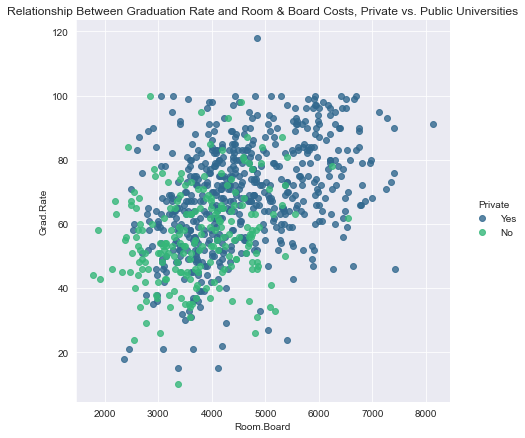

In [83]:

sns.set_style('darkgrid')
scatter_plot = sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private',
                          palette='viridis', height=6, aspect=1, fit_reg=False)

plt.title("Relationship Between Graduation Rate and Room & Board Costs, Private vs. Public Universities")

# Show the plot
plt.show()

Here is a scatter plot illustrating the relationship between Graduation Rate (Grad.Rate) and Room and Board costs (Room.Board), with data points differentiated by the Private column through color-coding.

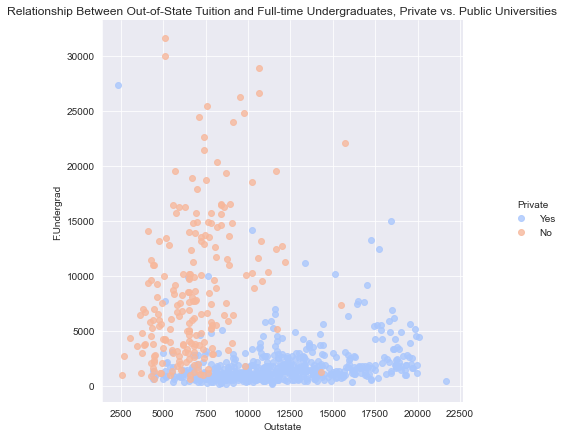

In [84]:
sns.set_style('darkgrid')
scatter_plot = sns.lmplot(x='Outstate', y='F.Undergrad', data=df, hue='Private',
                          palette='coolwarm', height=6, aspect=1, fit_reg=False)
plt.title("Relationship Between Out-of-State Tuition and Full-time Undergraduates, Private vs. Public Universities")
plt.show()

Here is a scatter plot illustrating the correlation between the number of full-time undergraduates (F.Undergrad) and out-of-state tuition costs (Outstate), with data points distinguished by the Private column through color representation.







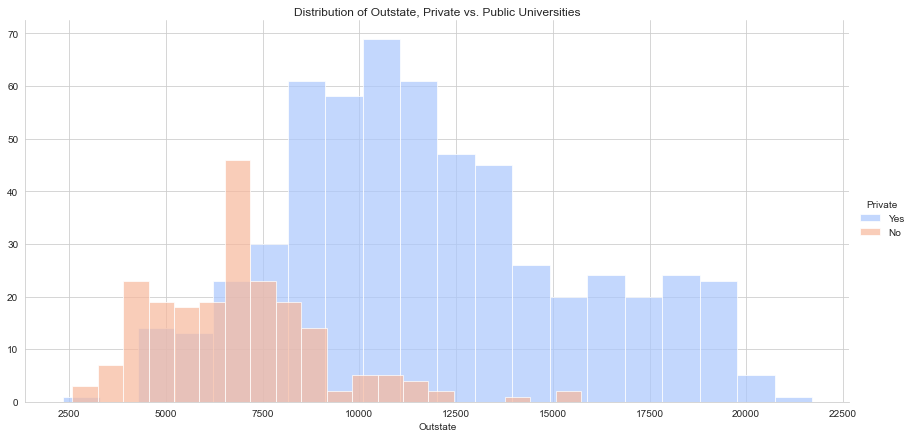

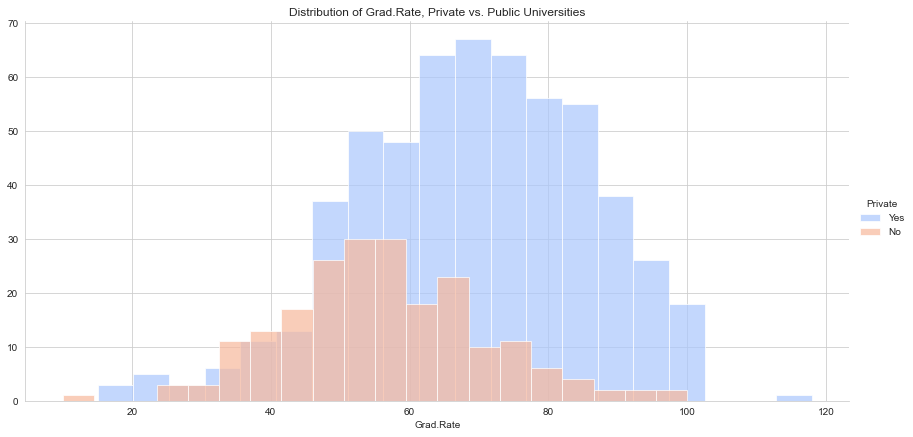

In [85]:
sns.set_style('whitegrid')

# Features for histograms
features = ['Outstate', 'Grad.Rate']

# Create subplots in a loop
for i, feature in enumerate(features, start=1):
    # Create a FacetGrid for each feature
    g = sns.FacetGrid(df, hue="Private", palette='coolwarm', height=6, aspect=2)
    g.map(plt.hist, feature, bins=20, alpha=0.7)
    g.add_legend()
    plt.title(f"Distribution of {feature}, Private vs. Public Universities")
    
    # Add a newline after the first plot
    if i == 1:
        plt.show()
    # Add subsequent plots side by side
    else:
        plt.show(block=False)

Notice here that private schools have significantly higher out of state tuition than public schools. Also, the second graph produces a school that has a graduation rate over 100 percent. This may mess up our analysis, so we'll set the graduation rate to be a 100 for that school. I show the school below:

In [86]:
df.query("`Grad.Rate` > 100")


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [87]:
df.loc['Cazenovia College', 'Grad.Rate'] = 100


Now I will attempt to implement the K-Means Algorithm. We want to fit the model to all the data except for the Private Label. I think provide the cluster center vectors.

In [88]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2)

In [89]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

In [90]:
df['Cluster'] = df['Private'].apply(lambda x: 1 if x == 'Yes' else 0)


In [91]:
from sklearn.metrics import confusion_matrix, classification_report

labels_true = df['Cluster']
labels_pred = kmeans.labels_

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(labels_true, labels_pred)
classification_rep = classification_report(labels_true, labels_pred)

# Print the results
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{classification_rep}")



Confusion Matrix:
[[ 74 138]
 [ 34 531]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



## Explanation of Confusion Matrix and Classification Report

True Positives (TP): 531 - Instances correctly predicted as class 1.

True Negatives (TN): 74 - Instances correctly predicted as class 0.

False Positives (FP): 138 - Instances predicted as class 1 but actually belong to class 0.

False Negatives (FN): 34 - Instances predicted as class 0 but actually belong to class 1.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives (TP / (TP + FP)).

Precision for class 0: 74 / (74 + 138) ≈ 0.35

Precision for class 1: 531 / (531 + 34) ≈ 0.94

Recall (Sensitivity or True Positive Rate): Recall is the ratio of correctly predicted positive observations to the all observations in the actual class (TP / (TP + FN)).

Recall for class 0: 74 / (74 + 34) ≈ 0.69
Recall for class 1: 531 / (531 + 138) ≈ 0.79
F1-Score: F1-Score is the weighted average of Precision and Recall, with values between 0 and 1. It is the harmonic mean of precision and recall (2 * (Precision * Recall) / (Precision + Recall)).

F1-Score for class 0: 2 * (0.35 * 0.69) / (0.35 + 0.69) ≈ 0.46

F1-Score for class 1: 2 * (0.94 * 0.79) / (0.94 + 0.79) ≈ 0.86

Support: The number of actual occurrences of each class in the specified dataset.

Accuracy: The overall accuracy of the model (correct predictions / total predictions).

Accuracy ≈ (74 + 531) / 777 ≈ 0.78

Macro Average: The average of precision, recall, and F1-score for both classes.

Weighted Average: The weighted average of precision, recall, and F1-score, with weights proportional to the number of true instances for each class.

## Conclusion:




Overall, we see that our K-Means algorithm had an accuracy of about 78%. This isn't great, but note that this algoritm is only use the features(and no labels) to classify/cluster the universities into two distinct clusters. As an unsupervised algorithm, it is fantastic for clustering data that is not labeled. I am unable to show a visual representation of K-means in this example, due to the dataset having 9 features....this is quite compuationally expensive. A further dig into the project would be to use PCA(Principal Component Analysis to reduce the amount of features and then repeat the K-means clustering algorithm to see if anything improved. 